In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline

#Create dataframe
df = pd.read_csv('abalone.data')
df.columns = ['sex','length','diameter','height','whole weight','shucked weight','viscera weight','shell weight','rings']

dfd = pd.get_dummies(df, columns = ['sex'])

In [29]:
df.columns

Index(['sex', 'length', 'diameter', 'height', 'whole weight', 'shucked weight',
       'viscera weight', 'shell weight', 'rings'],
      dtype='object')

In [30]:
dfd.corr()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings,sex_F,sex_I,sex_M
length,1.000000,0.986813,0.827552,0.925255,0.897905,0.903010,0.897697,0.557123,0.309602,-0.551613,0.236783
diameter,0.986813,1.000000,0.833705,0.925452,0.893159,0.899726,0.905328,0.575005,0.318581,-0.564431,0.240567
height,0.827552,0.833705,1.000000,0.819209,0.774957,0.798293,0.817326,0.558109,0.298306,-0.518828,0.215869
whole weight,0.925255,0.925452,0.819209,1.000000,0.969403,0.966372,0.955351,0.540818,0.299668,-0.557757,0.252305
shucked weight,0.897905,0.893159,0.774957,0.969403,1.000000,0.931956,0.882606,0.421256,0.263919,-0.521995,0.252048
viscera weight,0.903010,0.899726,0.798293,0.966372,0.931956,1.000000,0.907647,0.504274,0.308363,-0.556267,0.242489
shell weight,0.897697,0.905328,0.817326,0.955351,0.882606,0.907647,1.000000,0.628031,0.306248,-0.547116,0.235652
rings,0.557123,0.575005,0.558109,0.540818,0.421256,0.504274,0.628031,1.000000,0.250620,-0.435958,0.181426
sex_F,0.309602,0.318581,0.298306,0.299668,0.263919,0.308363,0.306248,0.250620,1.000000,-0.464461,-0.512449
sex_I,-0.551613,-0.564431,-0.518828,-0.557757,-0.521995,-0.556267,-0.547116,-0.435958,-0.464461,1.000000,-0.522462


In [31]:
dfd.dtypes

length            float64
diameter          float64
height            float64
whole weight      float64
shucked weight    float64
viscera weight    float64
shell weight      float64
rings               int64
sex_F               uint8
sex_I               uint8
sex_M               uint8
dtype: object

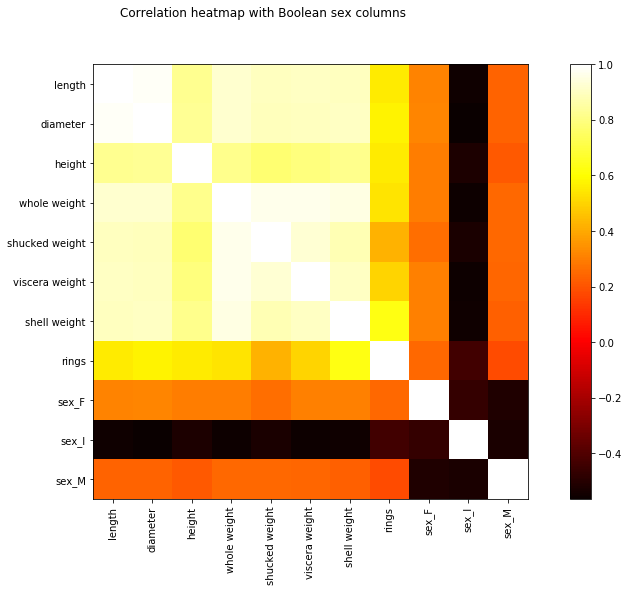

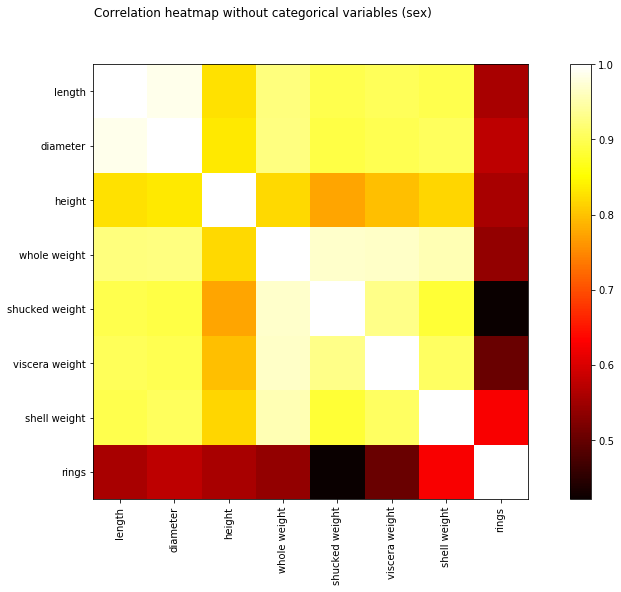

In [32]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
plt.imshow(dfd.corr(), cmap='hot', interpolation='nearest')
plt.colorbar()
plt.suptitle('Correlation heatmap with Boolean sex columns')
labels = dfd.columns.tolist()
ax1.set_xticks(np.arange(len(labels)))
ax1.set_yticks(np.arange(len(labels)))
ax1.set_xticklabels(labels,rotation=90, fontsize=10)
ax1.set_yticklabels(labels,fontsize=10)
plt.show()

fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
plt.imshow(df.corr(), cmap='hot', interpolation='nearest')
plt.colorbar()
plt.suptitle('Correlation heatmap without categorical variables (sex)')
labels=df.columns.tolist()
ax1.set_xticklabels(labels,rotation=90, fontsize=10)
ax1.set_yticklabels(labels, fontsize=10)
plt.show()

In [33]:
#Features to keep based on histogram shape and correlation grid:  
#length, whole weight/shell weight, height?
#Lets try to understand the sex variables more

df['sex'].value_counts()

M    1527
I    1342
F    1307
Name: sex, dtype: int64

In [34]:
#with sex column removed

df.drop('sex', axis=1, inplace=True)

y = df['rings']
X = df.drop('rings', axis=1)

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)



0.490870670463
[[ 1.          0.70135745]
 [ 0.70135745  1.        ]]


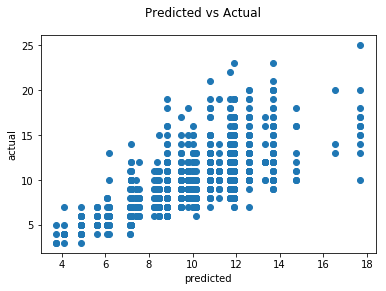

In [35]:
regressor = DecisionTreeRegressor(max_depth=5, min_samples_split=35, min_samples_leaf=20, random_state=0)

model = regressor.fit(X_train, y_train)
score = model.score(X_test, y_test)
print(score)
print(np.corrcoef(model.predict(X_test), y_test))

plt.scatter(model.predict(X_test), y_test)
plt.suptitle('Predicted vs Actual')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

Whelp.  Removing the sex categories sure didn't negatively impact our scores.  Let's see what else we can get rid of.

WAIT.  Let's keep the juvenile column.

0.498197068103
[[ 1.         0.7065174]
 [ 0.7065174  1.       ]]


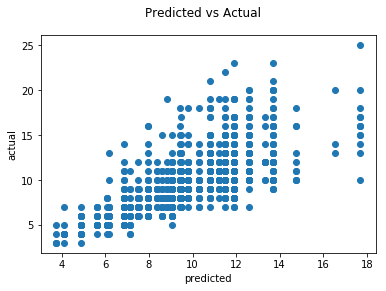

In [37]:
#drop sex_F and sex_M columns

dfd.drop(['sex_F','sex_M'], axis=1, inplace=True)

y = dfd['rings']
X = dfd.drop('rings', axis=1)

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

regressor = DecisionTreeRegressor(max_depth=5, min_samples_split=35, min_samples_leaf=20, random_state=0)

model = regressor.fit(X_train, y_train)
score = model.score(X_test, y_test)
print(score)
print(np.corrcoef(model.predict(X_test), y_test))

plt.scatter(model.predict(X_test), y_test)
plt.suptitle('Predicted vs Actual')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

An infinitesimal improvement over dropping Sex altogether.  Meh.

0.426808341975
[[ 1.          0.65578725]
 [ 0.65578725  1.        ]]


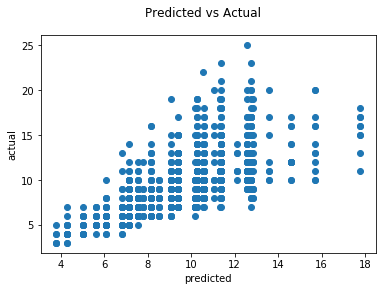

In [38]:
#Let's drop more from df. Diameter, shucked weight, and viscera weight

df.drop(['diameter','shucked weight','viscera weight'], axis=1, inplace=True)

y = df['rings']
X = df.drop('rings', axis=1)

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

regressor = DecisionTreeRegressor(max_depth=5, min_samples_split=35, min_samples_leaf=20, random_state=0)

model = regressor.fit(X_train, y_train)
score = model.score(X_test, y_test)
print(score)
print(np.corrcoef(model.predict(X_test), y_test))

plt.scatter(model.predict(X_test), y_test)
plt.suptitle('Predicted vs Actual')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

Really!  Our score went down.  Huh.  Hm.  So, one of those was actually important.

0.49807620994
[[ 1.          0.70619693]
 [ 0.70619693  1.        ]]


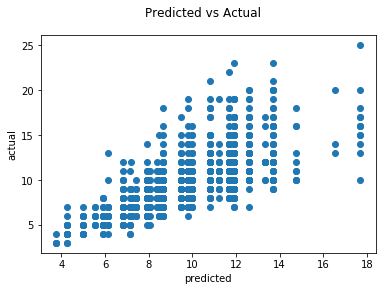

Index(['diameter', 'shucked weight', 'shell weight', 'rings'], dtype='object')

In [48]:
#recreate dataframe
df = pd.read_csv('abalone.data')
df.columns = ['sex','length','diameter','height','whole weight','shucked weight','viscera weight','shell weight','rings']

#Removing various features to see if they effect the score.
#drop sex, viscera weight, whole weight, length, height

df_R = df.drop(['sex','viscera weight', 'whole weight', 'length','height'], axis=1)

y = df_R['rings']
X = df_R.drop('rings', axis=1)

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

regressor = DecisionTreeRegressor(max_depth=5, min_samples_split=35, min_samples_leaf=20, random_state=0)

model = regressor.fit(X_train, y_train)
score = model.score(X_test, y_test)
print(score)
print(np.corrcoef(model.predict(X_test), y_test))

plt.scatter(model.predict(X_test), y_test)
plt.suptitle('Predicted vs Actual')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

df_R.columns

I tried to remove shucked weight and my score went down, so I added it back.

Testing brought it down to... 4 features.  Wow.  Let's put the column sex_I back in there.

0.49495226588
[[ 1.          0.70439408]
 [ 0.70439408  1.        ]]


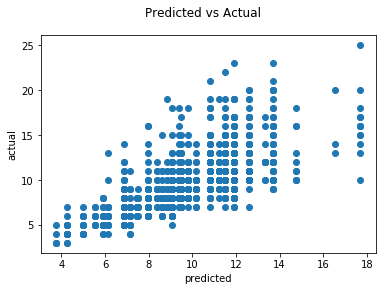

Index(['diameter', 'shucked weight', 'shell weight', 'rings', 'sex_I'], dtype='object')

In [51]:
df_R_I = pd.concat([df_R, dfd.sex_I], axis=1)

y = df_R_I['rings']
X = df_R_I.drop('rings', axis=1)

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

regressor = DecisionTreeRegressor(max_depth=5, min_samples_split=35, min_samples_leaf=20, random_state=0)

model = regressor.fit(X_train, y_train)
score = model.score(X_test, y_test)
print(score)
print(np.corrcoef(model.predict(X_test), y_test))

plt.scatter(model.predict(X_test), y_test)
plt.suptitle('Predicted vs Actual')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

df_R_I.columns


Nope.  Brought us down a bit.  But look!  I understand concatenation in pandas better.  Good job.